In [10]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20250904_0642.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

# Load the contents
with open("hellaswag_eval_20250904_0642.jsonl", "r") as f:
    hellaswag = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics = df_metrics.merge(pd.DataFrame(hellaswag), on="step", how="left")
df_metrics

,step,loss,norm,tokens_per_second,lr,shard_index,hellaswag_acc
0,0,11.055651,6.025328,4920.001698,1.000000e-04,0,0.253635
1,5,9.240644,2.079573,149316.320159,1.000000e-04,0,NaN
2,10,8.746695,1.783663,148440.630826,1.000000e-04,0,NaN
3,15,8.347257,1.299520,148665.583690,1.000000e-04,0,NaN
4,20,8.111946,0.972407,150497.468299,1.000000e-04,0,NaN
...,...,...,...,...,...,...,...
28699,143495,1.765061,4.384021,145915.475261,4.631766e-07,47,NaN
28700,143500,1.851981,4.469025,145781.906181,4.624659e-07,47,NaN
28701,143505,1.757922,4.337661,145337.309560,4.617556e-07,47,NaN
28702,143510,1.602254,4.069183,146080.956795,4.610460e-07,47,NaN


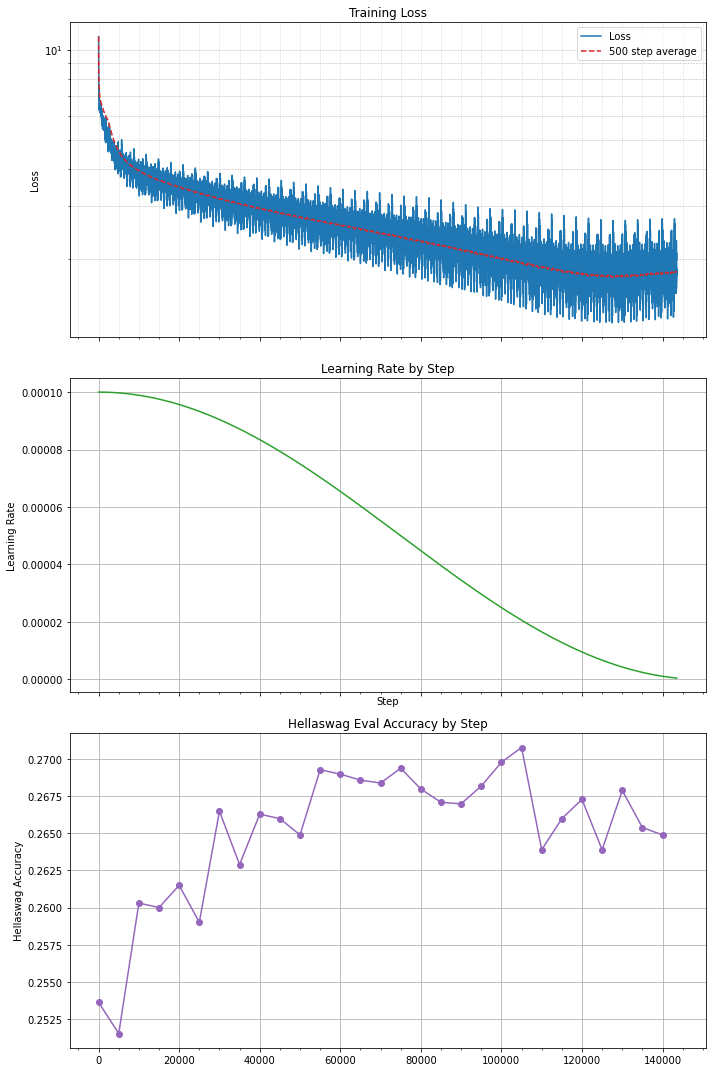

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Add a smoothed loss column using rolling mean
df_metrics['loss_smooth'] = df_metrics['loss'].rolling(window=500, min_periods=1).mean()

# Plot the smoothed loss line
ax1.plot(df_metrics['step'], df_metrics['loss'], color='tab:blue', label='Loss')
ax1.plot(df_metrics['step'], df_metrics['loss_smooth'], color='tab:red', linestyle='--', label='500 step average', zorder=3)
ax1.legend()
ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
ax1.set_yscale('log')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot Learning Rate
ax2.plot(df_metrics['step'], df_metrics['lr'], color='tab:green')
ax2.set_xlabel('Step')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate by Step')
ax2.grid(True)

# Plot Hellaswag eval metric
hellaswag_steps = [d['step'] for d in hellaswag]
hellaswag_acc = [d['hellaswag_acc'] for d in hellaswag]
ax3.plot(hellaswag_steps, hellaswag_acc, marker='o', color='tab:purple')
ax3.set_ylabel('Hellaswag Accuracy')
ax3.set_title('Hellaswag Eval Accuracy by Step')
ax3.grid(True)

plt.tight_layout()
plt.show()


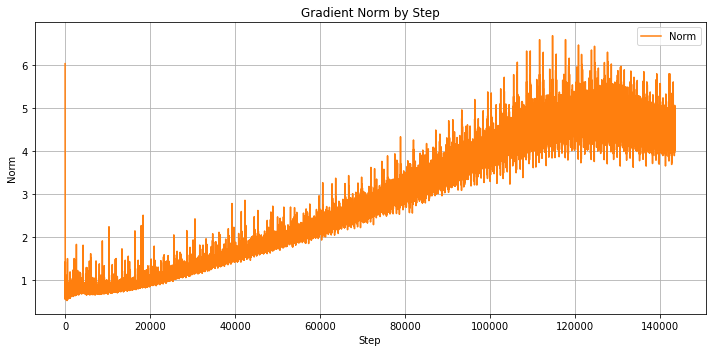

In [15]:
# Plot Norm
fig_norm, ax_norm = plt.subplots(figsize=(10, 5))
ax_norm.plot(df_metrics['step'], df_metrics['norm'], color='tab:orange', label='Norm')
ax_norm.set_xlabel('Step')
ax_norm.set_ylabel('Norm')
ax_norm.set_title('Gradient Norm by Step')
ax_norm.grid(True)
ax_norm.legend()
plt.tight_layout()
plt.show()
